[**Demo %s**](#demo-blackscholes-unstable)

Let's try to do everything the same as in {numref}`Demo {number} <demo-blackscholes-solve>`, but extending the simulation time to $T=8$.

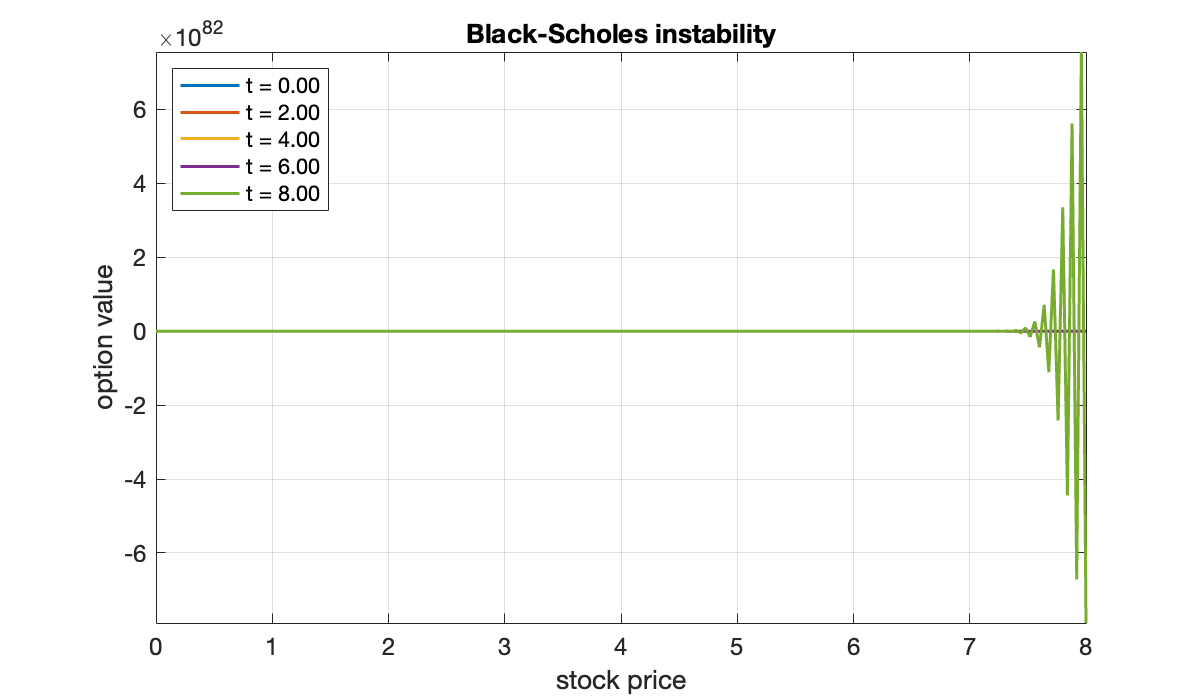

In [5]:
Smax = 8;  
K = 3;  sigma = 0.06;  r = 0.08;
m = 200;  h = Smax / m;
x = h*(0:m)';
T = 8;
n = 1000;  tau = T / n;
t = tau*(0:n)';
lambda = tau / h^2;  mu = tau / h;
V = zeros(m+1, n+1);
V(:, 1) = max(0, x - K);
for j = 1:n
    % Fictitious value from Neumann condition.
    Vfict = 2*h + V(m, j);
    Vj = [ V(:, j); Vfict ];
    % First row is zero by the Dirichlet condition.
    for i = 2:m+1 
        diff1 = (Vj(i+1) - Vj(i-1));
        diff2 = (Vj(i+1) - 2*Vj(i) + Vj(i-1));
        V(i, j+1) = Vj(i) ...
             + (lambda*sigma^2 * x(i)^2/2) * diff2  ...
             + (r*mu * x(i))/2 * diff1 - r*tau * Vj(i);
    end   
end

index_times = 1 + 250*(0:4);
show_times = t(index_times);
for j = index_times
    str = sprintf("t = %.2f", t(j));
    plot(x, V(:, j), displayname=str) 
    hold on
end
title('Black-Scholes instability')
xlabel('stock price'),  ylabel('option value')
axis tight,  grid on
legend(location="northwest")

In [ ]:
clf
plot(x, V(:, 1))
hold on,  grid on
axis([0, 8, 0, 6])
title('Black-Scholes solution...?') 
xlabel('stock price'),  ylabel('option value')
vid = VideoWriter("black-scholes-8.mp4","MPEG-4");
vid.Quality = 85;
open(vid);
for frame = 1:10:n+1
    cla, plot(x, V(:, frame))
    str = sprintf("t = %.2f", t(frame));
    text(0.4, 5.2, str);
    writeVideo(vid, frame2im(getframe(gcf)));
end
close(vid)

This so-called solution is nonsense!